<h1 align="center"> <strong>🎯 Support Vector Machines (SVM) - Complete Guide</strong> </h1>

This notebook provides a comprehensive introduction to Support Vector Machines, covering:
- Mathematical foundation and theory
- Linear and non-linear SVM implementation
- Kernel functions and the kernel trick
- Hyperparameter tuning and regularization
- Classification and regression examples
- Real-world applications and best practices

---

## 📋 Table of Contents
1. [Import Libraries and Setup](#libraries)
2. [Theory & Mathematical Foundation](#theory)
3. [Generate Sample Data , Linear SVM Implementation](#data)
4. [Kernel Functions and Non-linear SVM](#kernels)
5. [Scikit-learn Implementation](#sklearn)
6. [Hyperparameter Tuning](#tuning)
7. [Real-World Applications](#applications)
8. [Advantages & Limitations](#pros-cons)
9. [Best Practices & Summary](#best-practices)

---

## **📚 1. Import Libraries and Setup** <a id="libraries"></a>

In [2]:
# Core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.datasets import make_classification, make_regression, load_iris, load_wine, load_breast_cancer, make_circles, make_moons
from sklearn.model_selection import (
    train_test_split, cross_val_score, 
    GridSearchCV, RandomizedSearchCV, learning_curve
)
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    mean_squared_error, r2_score, mean_absolute_error,
    precision_score, recall_score, f1_score
)
from sklearn.preprocessing import StandardScaler

# Statistical analysis
from scipy.stats import uniform

# Visualization settings
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## **🧠 2. Theory & Mathematical Foundation** <a id="theory"></a>

### **What is Support Vector Machine?** 🤔

Support Vector Machine (SVM) is a powerful supervised learning algorithm that finds the **optimal hyperplane** to separate different classes or predict continuous values. The key idea is to maximize the **margin** between classes.

### **Core Concepts:**

#### **1. Hyperplane and Margin**
- **Hyperplane**: A decision boundary that separates classes
- **Margin**: Distance between the hyperplane and the nearest data points
- **Support Vectors**: Data points closest to the hyperplane

#### **2. Mathematical Formulation**

**Linear SVM Objective:**
$$\min_{w,b} \frac{1}{2}||w||^2$$

**Subject to:**
$$y_i(w^T x_i + b) \geq 1, \quad \forall i$$

**With Soft Margin (C parameter):**
$$\min_{w,b,\xi} \frac{1}{2}||w||^2 + C\sum_{i=1}^{n}\xi_i$$

**Subject to:**
$$y_i(w^T x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0$$

#### **3. Decision Function**
$$f(x) = \text{sign}\left(\sum_{i=1}^{n} \alpha_i y_i K(x_i, x) + b\right)$$

Where:
- $w$: weight vector
- $b$: bias term
- $\xi_i$: slack variables
- $C$: regularization parameter
- $\alpha_i$: Lagrange multipliers
- $K(x_i, x)$: kernel function

### **Key Characteristics:**
- **Maximum Margin**: Finds the optimal separating hyperplane
- **Kernel Trick**: Handles non-linear relationships
- **Support Vectors**: Only support vectors affect the decision boundary
- **Robust to Outliers**: Less sensitive to outliers compared to other algorithms
- **Memory Efficient**: Uses a subset of training points (support vectors)

## **📊 3. Generate Sample Data** <a id="data"></a>

🎯 Creating Various Datasets for SVM Analysis

1️⃣ Linear Classification Dataset
Linear dataset shape: (300, 2)
Classes: [0 1]

2️⃣ Non-linear Classification Datasets
Circles dataset shape: (300, 2)
Moons dataset shape: (300, 2)

3️⃣ Regression Dataset
Regression dataset shape: (400, 1)

4️⃣ Real-world Datasets
Iris dataset shape: (150, 4)
Wine dataset shape: (178, 13)
Breast Cancer dataset shape: (569, 30)


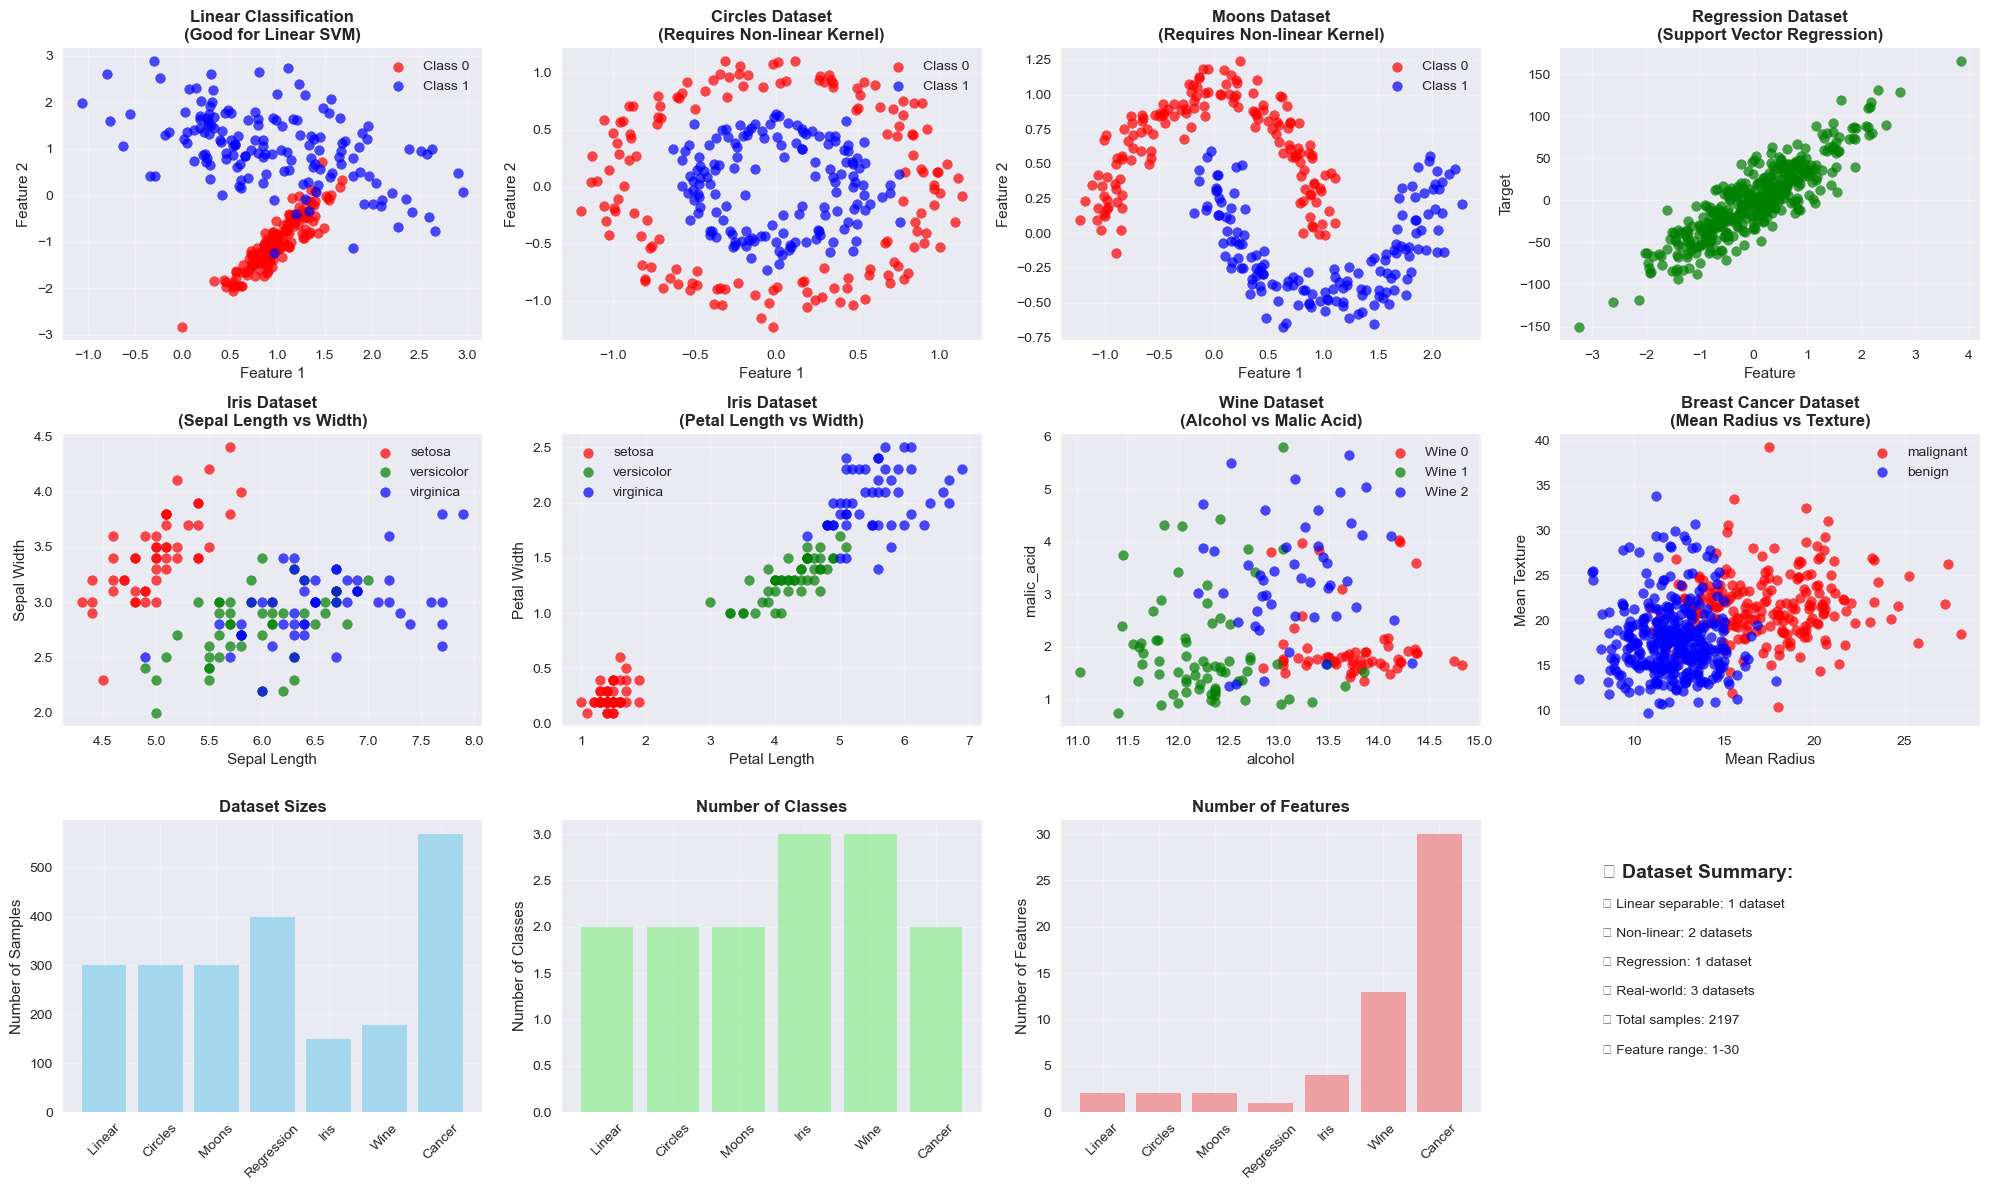


📊 Data Generation Complete:
✅ Created diverse datasets for comprehensive SVM analysis
✅ Included both linear and non-linear classification problems
✅ Added regression dataset for SVR demonstration
✅ Loaded real-world datasets for practical examples


In [3]:
# Set random seed for reproducibility
np.random.seed(42)

print("🎯 Creating Various Datasets for SVM Analysis")

# 1. Linear Classification Dataset
print("\n1️⃣ Linear Classification Dataset")
X_linear, y_linear = make_classification(n_samples=300, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state=42)

print(f"Linear dataset shape: {X_linear.shape}")
print(f"Classes: {np.unique(y_linear)}")

# 2. Non-linear Classification Datasets
print("\n2️⃣ Non-linear Classification Datasets")

# Circles dataset
X_circles, y_circles = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=42)
print(f"Circles dataset shape: {X_circles.shape}")

# Moons dataset
X_moons, y_moons = make_moons(n_samples=300, noise=0.1, random_state=42)
print(f"Moons dataset shape: {X_moons.shape}")

# 3. Regression Dataset
print("\n3️⃣ Regression Dataset")
X_reg, y_reg = make_regression(n_samples=400, n_features=1, noise=20, random_state=42)

print(f"Regression dataset shape: {X_reg.shape}")

# 4. Real-world Datasets
print("\n4️⃣ Real-world Datasets")

# Load Iris dataset
iris = load_iris()
X_iris, y_iris = iris.data, iris.target

# Load Wine dataset
wine = load_wine()
X_wine, y_wine = wine.data, wine.target

# Load Breast Cancer dataset
cancer = load_breast_cancer()
X_cancer, y_cancer = cancer.data, cancer.target

print(f"Iris dataset shape: {X_iris.shape}")
print(f"Wine dataset shape: {X_wine.shape}")
print(f"Breast Cancer dataset shape: {X_cancer.shape}")

# Visualization
plt.figure(figsize=(20, 12))

# Linear Classification
plt.subplot(3, 4, 1)
colors = ['red', 'blue']
for i, color in enumerate(colors):
    idx = y_linear == i
    plt.scatter(X_linear[idx, 0], X_linear[idx, 1], c=color, alpha=0.7, label=f'Class {i}')
plt.title('Linear Classification\n(Good for Linear SVM)', fontweight='bold')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)

# Circles
plt.subplot(3, 4, 2)
for i, color in enumerate(colors):
    idx = y_circles == i
    plt.scatter(X_circles[idx, 0], X_circles[idx, 1], c=color, alpha=0.7, label=f'Class {i}')
plt.title('Circles Dataset\n(Requires Non-linear Kernel)', fontweight='bold')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)

# Moons
plt.subplot(3, 4, 3)
for i, color in enumerate(colors):
    idx = y_moons == i
    plt.scatter(X_moons[idx, 0], X_moons[idx, 1], c=color, alpha=0.7, label=f'Class {i}')
plt.title('Moons Dataset\n(Requires Non-linear Kernel)', fontweight='bold')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)

# Regression
plt.subplot(3, 4, 4)
plt.scatter(X_reg, y_reg, alpha=0.7, color='green')
plt.title('Regression Dataset\n(Support Vector Regression)', fontweight='bold')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.grid(True, alpha=0.3)

# Iris (first 2 features)
plt.subplot(3, 4, 5)
iris_colors = ['red', 'green', 'blue']
for i, (color, name) in enumerate(zip(iris_colors, iris.target_names)):
    idx = y_iris == i
    plt.scatter(X_iris[idx, 0], X_iris[idx, 1], c=color, alpha=0.7, label=name)
plt.title('Iris Dataset\n(Sepal Length vs Width)', fontweight='bold')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.grid(True, alpha=0.3)

# Iris (petal features)
plt.subplot(3, 4, 6)
for i, (color, name) in enumerate(zip(iris_colors, iris.target_names)):
    idx = y_iris == i
    plt.scatter(X_iris[idx, 2], X_iris[idx, 3], c=color, alpha=0.7, label=name)
plt.title('Iris Dataset\n(Petal Length vs Width)', fontweight='bold')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.grid(True, alpha=0.3)

# Wine (first 2 features)
plt.subplot(3, 4, 7)
wine_colors = ['red', 'green', 'blue']
for i, color in enumerate(wine_colors):
    idx = y_wine == i
    plt.scatter(X_wine[idx, 0], X_wine[idx, 1], c=color, alpha=0.7, label=f'Wine {i}')
plt.title('Wine Dataset\n(Alcohol vs Malic Acid)', fontweight='bold')
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.legend()
plt.grid(True, alpha=0.3)

# Breast Cancer (first 2 features)
plt.subplot(3, 4, 8)
cancer_colors = ['red', 'blue']
for i, (color, name) in enumerate(zip(cancer_colors, cancer.target_names)):
    idx = y_cancer == i
    plt.scatter(X_cancer[idx, 0], X_cancer[idx, 1], c=color, alpha=0.7, label=name)
plt.title('Breast Cancer Dataset\n(Mean Radius vs Texture)', fontweight='bold')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend()
plt.grid(True, alpha=0.3)

# Data distribution analysis
plt.subplot(3, 4, 9)
datasets_info = {
    'Linear': len(y_linear),
    'Circles': len(y_circles),
    'Moons': len(y_moons),
    'Regression': len(y_reg),
    'Iris': len(y_iris),
    'Wine': len(y_wine),
    'Cancer': len(y_cancer)
}
plt.bar(datasets_info.keys(), datasets_info.values(), color='skyblue', alpha=0.7)
plt.title('Dataset Sizes', fontweight='bold')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Class distribution for classification datasets
plt.subplot(3, 4, 10)
class_distributions = {
    'Linear': len(np.unique(y_linear)),
    'Circles': len(np.unique(y_circles)),
    'Moons': len(np.unique(y_moons)),
    'Iris': len(np.unique(y_iris)),
    'Wine': len(np.unique(y_wine)),
    'Cancer': len(np.unique(y_cancer))
}
plt.bar(class_distributions.keys(), class_distributions.values(), color='lightgreen', alpha=0.7)
plt.title('Number of Classes', fontweight='bold')
plt.ylabel('Number of Classes')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Feature dimensions
plt.subplot(3, 4, 11)
feature_dims = {
    'Linear': X_linear.shape[1],
    'Circles': X_circles.shape[1],
    'Moons': X_moons.shape[1],
    'Regression': X_reg.shape[1],
    'Iris': X_iris.shape[1],
    'Wine': X_wine.shape[1],
    'Cancer': X_cancer.shape[1]
}
plt.bar(feature_dims.keys(), feature_dims.values(), color='lightcoral', alpha=0.7)
plt.title('Number of Features', fontweight='bold')
plt.ylabel('Number of Features')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Summary statistics
plt.subplot(3, 4, 12)
plt.text(0.1, 0.8, "📊 Dataset Summary:", fontsize=14, fontweight='bold', transform=plt.gca().transAxes)
plt.text(0.1, 0.7, f"✅ Linear separable: 1 dataset", fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.6, f"✅ Non-linear: 2 datasets", fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.5, f"✅ Regression: 1 dataset", fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.4, f"✅ Real-world: 3 datasets", fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.3, f"✅ Total samples: {sum(datasets_info.values())}", fontsize=10, transform=plt.gca().transAxes)
plt.text(0.1, 0.2, f"✅ Feature range: {min(feature_dims.values())}-{max(feature_dims.values())}", fontsize=10, transform=plt.gca().transAxes)
plt.axis('off')

plt.tight_layout()
plt.show()

print("\n📊 Data Generation Complete:")
print("✅ Created diverse datasets for comprehensive SVM analysis")
print("✅ Included both linear and non-linear classification problems")
print("✅ Added regression dataset for SVR demonstration")
print("✅ Loaded real-world datasets for practical examples")

## **🔮 4. Kernel Functions and Non-linear SVM** <a id="kernels"></a>

### **The Kernel Trick** 🎭

The kernel trick allows SVM to handle non-linear relationships by mapping data to a higher-dimensional space where it becomes linearly separable.

#### **Common Kernel Functions:**

##### **1. Linear Kernel**
$$K(x_i, x_j) = x_i^T x_j$$

##### **2. Polynomial Kernel**
$$K(x_i, x_j) = (x_i^T x_j + c)^d$$

##### **3. Radial Basis Function (RBF/Gaussian) Kernel**
$$K(x_i, x_j) = \exp\left(-\gamma ||x_i - x_j||^2\right)$$

##### **4. Sigmoid Kernel**
$$K(x_i, x_j) = \tanh(\gamma x_i^T x_j + c)$$

### **Key Parameters:**
- **C (Regularization)**: Controls trade-off between smooth decision boundary and classifying training points correctly
- **γ (Gamma)**: Controls influence of single training example (RBF kernel)
- **degree**: Degree of polynomial kernel
- **coef0**: Independent term in polynomial/sigmoid kernels

🔮 Kernel Functions Demonstration


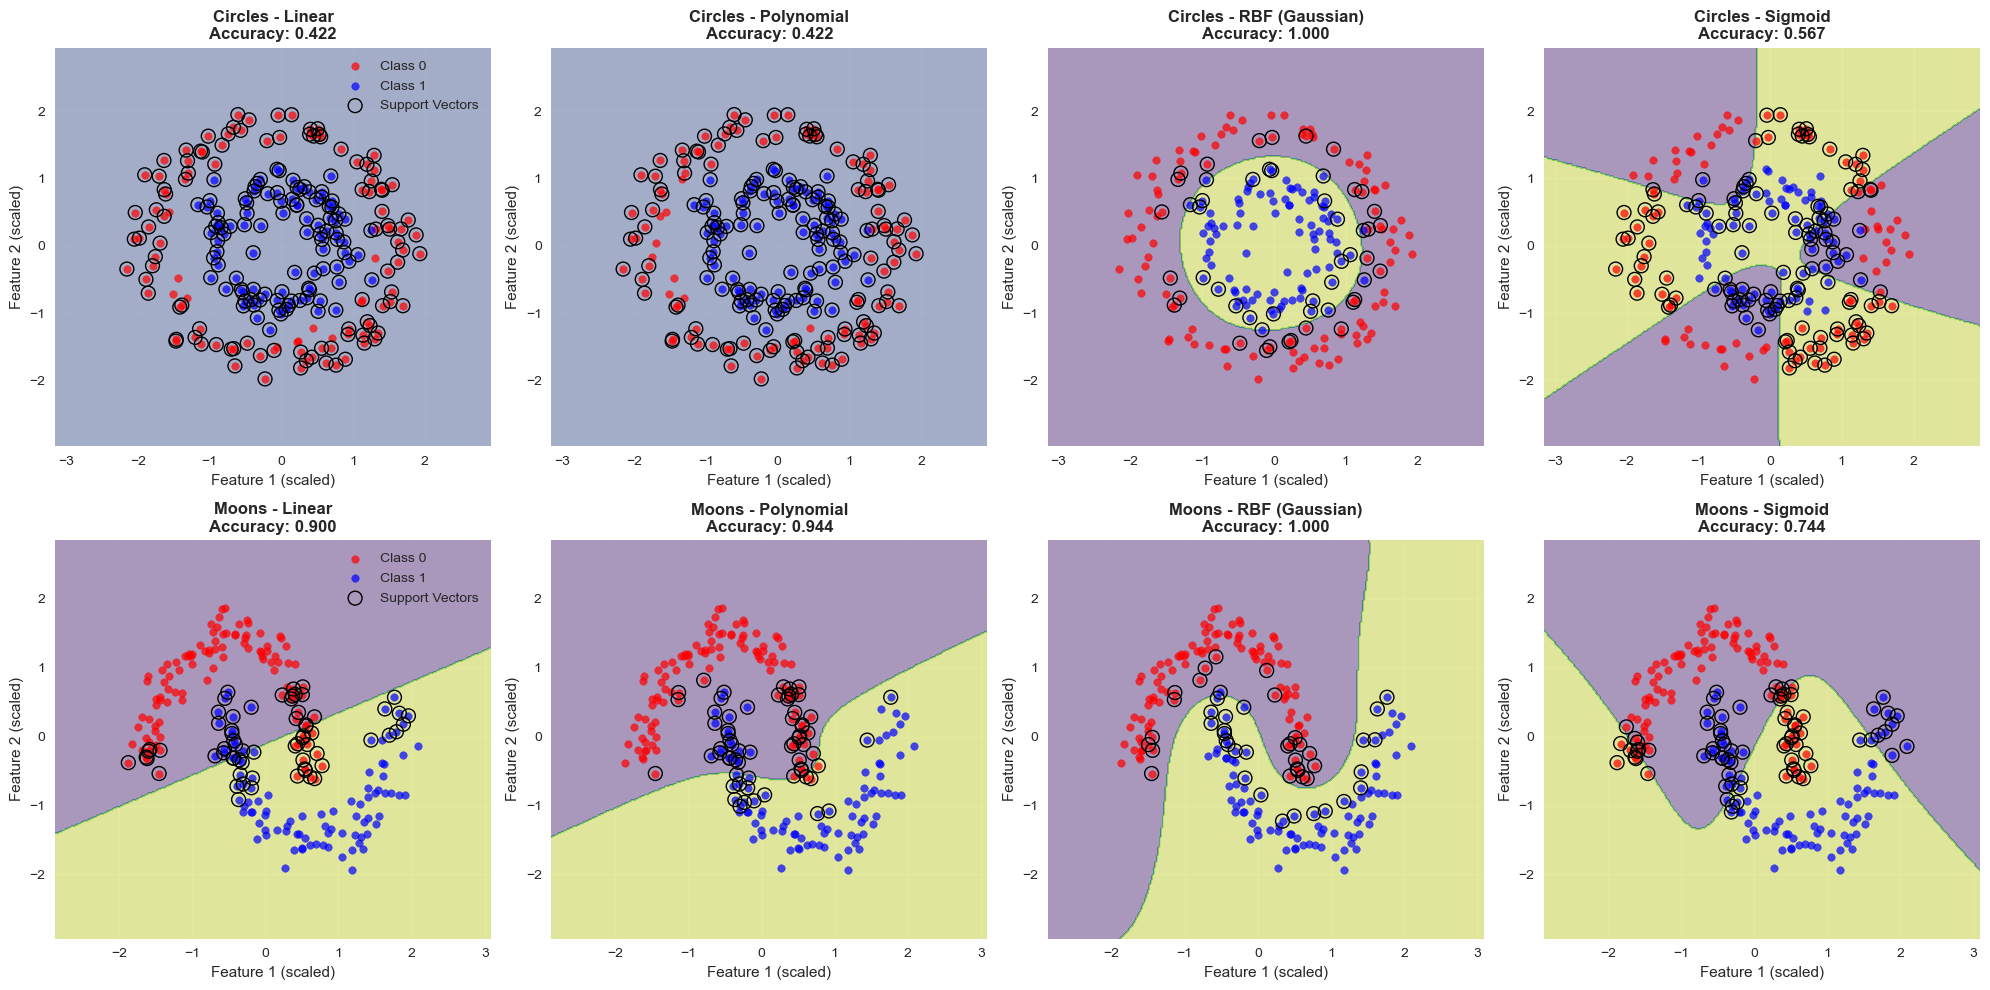


📊 Kernel Performance Comparison:


,Dataset,Kernel,Train_Accuracy,Test_Accuracy,Support_Vectors
0,Circles,Linear,0.533,0.422,199
1,Circles,Polynomial,0.533,0.422,201
2,Circles,RBF (Gaussian),0.986,1.000,51
3,Circles,Sigmoid,0.500,0.567,135
4,Moons,Linear,0.867,0.900,66
5,Moons,Polynomial,0.895,0.944,64
6,Moons,RBF (Gaussian),0.995,1.000,48
7,Moons,Sigmoid,0.714,0.744,78



🎯 Kernel Selection Guidelines:
• Linear: Use when data is linearly separable or high-dimensional
• Polynomial: Good for moderately non-linear data, can overfit easily
• RBF: Most popular, good default choice for non-linear data
• Sigmoid: Behaves like neural network, less commonly used


In [5]:
# Demonstrate different kernel functions on non-linear datasets
print("🔮 Kernel Functions Demonstration")

# Prepare datasets for kernel comparison
datasets = {
    'Circles': (X_circles, y_circles),
    'Moons': (X_moons, y_moons)
}

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_names = ['Linear', 'Polynomial', 'RBF (Gaussian)', 'Sigmoid']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for dataset_idx, (dataset_name, (X, y)) in enumerate(datasets.items()):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Create mesh for decision boundary
    h = 0.02
    x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
    y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    
    for kernel_idx, (kernel, kernel_name) in enumerate(zip(kernels, kernel_names)):
        ax = axes[dataset_idx, kernel_idx]
        
        # Train SVM with specific kernel
        svm = SVC(kernel=kernel, random_state=42)
        svm.fit(X_train_scaled, y_train)
        
        # Predict on mesh
        Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # Plot decision boundary
        ax.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
        
        # Plot training points
        colors = ['red', 'blue']
        for i, color in enumerate(colors):
            idx = y_train == i
            ax.scatter(X_train_scaled[idx, 0], X_train_scaled[idx, 1], c=color, alpha=0.7, s=30, label=f'Class {i}')
        
        # Plot support vectors
        if hasattr(svm, 'support_vectors_'):
            ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1],s=100, linewidth=1, facecolors='none', edgecolors='black', label='Support Vectors')
        
        # Calculate accuracy
        accuracy = svm.score(X_test_scaled, y_test)
        
        ax.set_title(f'{dataset_name} - {kernel_name}\nAccuracy: {accuracy:.3f}', fontweight='bold')
        ax.set_xlabel('Feature 1 (scaled)')
        ax.set_ylabel('Feature 2 (scaled)')
        if kernel_idx == 0:
            ax.legend()
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Detailed comparison
print("\n📊 Kernel Performance Comparison:")
performance_data = []

for dataset_name, (X, y) in datasets.items():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    for kernel, kernel_name in zip(kernels, kernel_names):
        svm = SVC(kernel=kernel, random_state=42)
        svm.fit(X_train_scaled, y_train)
        
        train_acc = svm.score(X_train_scaled, y_train)
        test_acc = svm.score(X_test_scaled, y_test)
        n_support = len(svm.support_)
        
        performance_data.append({
            'Dataset': dataset_name,
            'Kernel': kernel_name,
            'Train_Accuracy': train_acc,
            'Test_Accuracy': test_acc,
            'Support_Vectors': n_support
        })

performance_df = pd.DataFrame(performance_data)
display(performance_df.round(3))

print("\n🎯 Kernel Selection Guidelines:")
print("• Linear: Use when data is linearly separable or high-dimensional")
print("• Polynomial: Good for moderately non-linear data, can overfit easily")
print("• RBF: Most popular, good default choice for non-linear data")
print("• Sigmoid: Behaves like neural network, less commonly used")

## **🛠️ 5. Scikit-learn Implementation** <a id="sklearn"></a>

### **SVM Classes in Scikit-learn**

#### **Classification:**
- `SVC`: C-Support Vector Classification
- `LinearSVC`: Linear Support Vector Classification (faster for linear kernels)
- `NuSVC`: Nu-Support Vector Classification

#### **Regression:**
- `SVR`: Support Vector Regression
- `LinearSVR`: Linear Support Vector Regression
- `NuSVR`: Nu-Support Vector Regression

🛠️ Scikit-learn SVM Implementation
Dataset: Iris with 150 samples and 4 features
Classes: ['setosa' 'versicolor' 'virginica']

1️⃣ Basic SVM Classification
📊 SVM Models Comparison:


,Model,Train_Accuracy,Test_Accuracy,CV_Mean,CV_Std,Support_Vectors,SV_Ratio
0,Linear SVM,0.971,0.911,0.971,0.023,21,0.200
1,RBF SVM,0.971,0.933,0.971,0.023,40,0.381
2,Polynomial SVM,0.914,0.867,0.895,0.019,39,0.371
3,Sigmoid SVM,0.914,0.911,0.924,0.023,42,0.400



2️⃣ Linear vs RBF SVM Detailed Analysis
Linear SVM Results:
Accuracy: 0.911
Support Vectors: 21
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45


RBF SVM Results:
Accuracy: 0.933
Support Vectors: 40
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45


3️⃣ Support Vector Regression (SVR)
📈 SVR Models Comparison:


,Model,Train_R2,Test_R2,Test_MSE,Test_MAE,Support_Vectors
0,Linear SVR,0.628,0.661,437.790,16.392,210
1,RBF SVR,0.403,0.370,812.048,21.269,208
2,Polynomial SVR,0.139,0.344,846.024,21.878,209


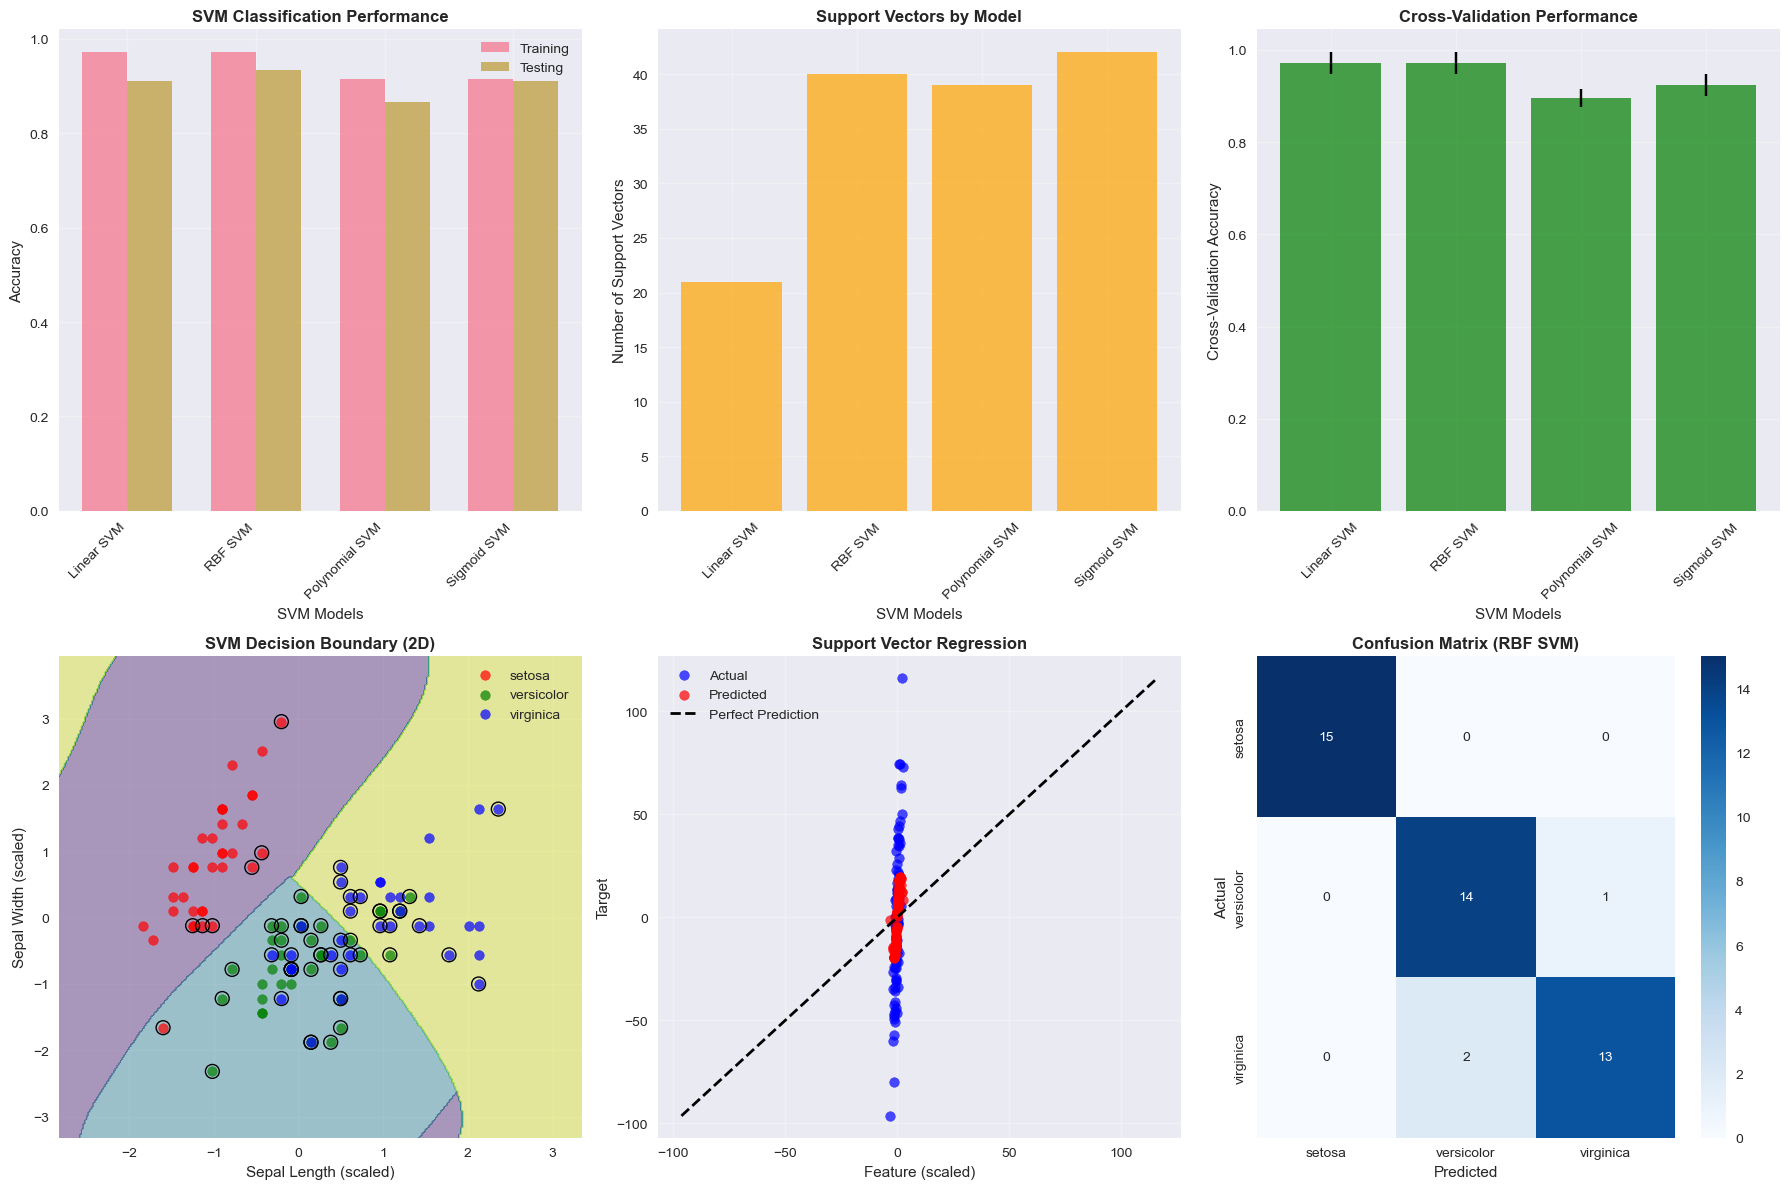


🏆 Best performing model: RBF SVM
📊 Final Results Summary:
✅ Classification accuracy: 0.933
✅ Best SVR R² score: 0.661
✅ Feature scaling is crucial for SVM performance
✅ RBF kernel often provides good balance of performance and complexity


In [7]:
# Comprehensive scikit-learn SVM implementation
print("🛠️ Scikit-learn SVM Implementation")

# Use the iris dataset for basic demonstration
iris = load_iris()
X_iris_svm, y_iris_svm = iris.data, iris.target

# Split and scale
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris_svm, y_iris_svm, test_size=0.3, random_state=42, stratify=y_iris_svm
)

scaler_iris = StandardScaler()
X_train_iris_scaled = scaler_iris.fit_transform(X_train_iris)
X_test_iris_scaled = scaler_iris.transform(X_test_iris)

print(f"Dataset: Iris with {X_iris_svm.shape[0]} samples and {X_iris_svm.shape[1]} features")
print(f"Classes: {iris.target_names}")

# 1. Basic SVM Classification
print("\n1️⃣ Basic SVM Classification")

# Create different SVM models
svm_models = {
    'Linear SVM': SVC(kernel='linear', random_state=42),
    'RBF SVM': SVC(kernel='rbf', random_state=42),
    'Polynomial SVM': SVC(kernel='poly', degree=3, random_state=42),
    'Sigmoid SVM': SVC(kernel='sigmoid', random_state=42)
}

svm_results = []

for name, model in svm_models.items():
    # Train the model
    model.fit(X_train_iris_scaled, y_train_iris)
    
    # Predictions
    train_score = model.score(X_train_iris_scaled, y_train_iris)
    test_score = model.score(X_test_iris_scaled, y_test_iris)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_iris_scaled, y_train_iris, cv=5)
    
    svm_results.append({
        'Model': name,
        'Train_Accuracy': train_score,
        'Test_Accuracy': test_score,
        'CV_Mean': cv_scores.mean(),
        'CV_Std': cv_scores.std(),
        'Support_Vectors': len(model.support_),
        'SV_Ratio': len(model.support_) / len(X_train_iris_scaled)
    })

svm_results_df = pd.DataFrame(svm_results)
print("📊 SVM Models Comparison:")
display(svm_results_df.round(3))

# 2. Linear vs RBF detailed comparison
print("\n2️⃣ Linear vs RBF SVM Detailed Analysis")

# Linear SVM
linear_svm = SVC(kernel='linear', random_state=42)
linear_svm.fit(X_train_iris_scaled, y_train_iris)
linear_pred = linear_svm.predict(X_test_iris_scaled)

# RBF SVM
rbf_svm = SVC(kernel='rbf', random_state=42)
rbf_svm.fit(X_train_iris_scaled, y_train_iris)
rbf_pred = rbf_svm.predict(X_test_iris_scaled)

print("Linear SVM Results:")
print(f"Accuracy: {accuracy_score(y_test_iris, linear_pred):.3f}")
print(f"Support Vectors: {len(linear_svm.support_)}")
print(classification_report(y_test_iris, linear_pred, target_names=iris.target_names))

print("\nRBF SVM Results:")
print(f"Accuracy: {accuracy_score(y_test_iris, rbf_pred):.3f}")
print(f"Support Vectors: {len(rbf_svm.support_)}")
print(classification_report(y_test_iris, rbf_pred, target_names=iris.target_names))

# 3. Support Vector Regression (SVR)
print("\n3️⃣ Support Vector Regression (SVR)")

# Create regression dataset
X_reg_svm, y_reg_svm = make_regression(n_samples=300, n_features=1, noise=20, random_state=42)

# Split and scale
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg_svm, y_reg_svm, test_size=0.3, random_state=42)

scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

# Train SVR models
svr_models = {
    'Linear SVR': SVR(kernel='linear'),
    'RBF SVR': SVR(kernel='rbf'),
    'Polynomial SVR': SVR(kernel='poly', degree=3)
}

svr_results = []

for name, model in svr_models.items():
    model.fit(X_train_reg_scaled, y_train_reg)
    
    train_pred = model.predict(X_train_reg_scaled)
    test_pred  = model.predict(X_test_reg_scaled)
    
    train_r2 = r2_score(y_train_reg, train_pred)
    test_r2  = r2_score(y_test_reg, test_pred)
    test_mse = mean_squared_error(y_test_reg, test_pred)
    test_mae = mean_absolute_error(y_test_reg, test_pred)
    
    svr_results.append({
        'Model': name,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'Test_MSE': test_mse,
        'Test_MAE': test_mae,
        'Support_Vectors': len(model.support_)
    })

svr_results_df = pd.DataFrame(svr_results)
print("📈 SVR Models Comparison:")
display(svr_results_df.round(3))

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Model accuracy comparison
models = svm_results_df['Model']
train_acc = svm_results_df['Train_Accuracy']
test_acc = svm_results_df['Test_Accuracy']

x_pos = np.arange(len(models))
width = 0.35

axes[0, 0].bar(x_pos - width/2, train_acc, width, label='Training', alpha=0.7)
axes[0, 0].bar(x_pos + width/2, test_acc, width, label='Testing', alpha=0.7)
axes[0, 0].set_xlabel('SVM Models')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('SVM Classification Performance', fontweight='bold')
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels(models, rotation=45, ha='right')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Support vectors comparison
axes[0, 1].bar(models, svm_results_df['Support_Vectors'], color='orange', alpha=0.7)
axes[0, 1].set_xlabel('SVM Models')
axes[0, 1].set_ylabel('Number of Support Vectors')
axes[0, 1].set_title('Support Vectors by Model', fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3)

# 3. Cross-validation scores
cv_means = svm_results_df['CV_Mean']
cv_stds = svm_results_df['CV_Std']

axes[0, 2].bar(models, cv_means, yerr=cv_stds, alpha=0.7, color='green', capsize=5)
axes[0, 2].set_xlabel('SVM Models')
axes[0, 2].set_ylabel('Cross-Validation Accuracy')
axes[0, 2].set_title('Cross-Validation Performance', fontweight='bold')
axes[0, 2].tick_params(axis='x', rotation=45)
axes[0, 2].grid(True, alpha=0.3)

# 4. Decision boundary visualization (using first 2 features)
X_2d = X_iris_svm[:, :2]  # Use first 2 features for visualization
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y_iris_svm, test_size=0.3, random_state=42, stratify=y_iris_svm)

scaler_2d = StandardScaler()
X_train_2d_scaled = scaler_2d.fit_transform(X_train_2d)

# Train RBF SVM on 2D data
svm_2d = SVC(kernel='rbf', random_state=42)
svm_2d.fit(X_train_2d_scaled, y_train_2d)

# Create mesh
h = 0.02
x_min, x_max = X_train_2d_scaled[:, 0].min() - 1, X_train_2d_scaled[:, 0].max() + 1
y_min, y_max = X_train_2d_scaled[:, 1].min() - 1, X_train_2d_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axes[1, 0].contourf(xx, yy, Z, alpha=0.4, cmap='viridis')

# Plot training points
colors = ['red', 'green', 'blue']
for i, color in enumerate(colors):
    idx = y_train_2d == i
    axes[1, 0].scatter(X_train_2d_scaled[idx, 0], X_train_2d_scaled[idx, 1], c=color, label=iris.target_names[i], alpha=0.7)

# Plot support vectors
axes[1, 0].scatter(svm_2d.support_vectors_[:, 0], svm_2d.support_vectors_[:, 1],s=100, linewidth=1, facecolors='none', edgecolors='black')

axes[1, 0].set_title('SVM Decision Boundary (2D)', fontweight='bold')
axes[1, 0].set_xlabel('Sepal Length (scaled)')
axes[1, 0].set_ylabel('Sepal Width (scaled)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 5. SVR visualization
best_svr = SVR(kernel='rbf')
best_svr.fit(X_train_reg_scaled, y_train_reg)
y_pred_svr = best_svr.predict(X_test_reg_scaled)

axes[1, 1].scatter(X_test_reg_scaled, y_test_reg, alpha=0.7, label='Actual', color='blue')
axes[1, 1].scatter(X_test_reg_scaled, y_pred_svr, alpha=0.7, label='Predicted', color='red')
axes[1, 1].plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=2, label='Perfect Prediction')
axes[1, 1].set_xlabel('Feature (scaled)')
axes[1, 1].set_ylabel('Target')
axes[1, 1].set_title('Support Vector Regression', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 6. Confusion matrix for best classification model
best_model_idx = svm_results_df['Test_Accuracy'].idxmax()
best_model_name = svm_results_df.loc[best_model_idx, 'Model']
best_model = svm_models[best_model_name]
best_pred = best_model.predict(X_test_iris_scaled)

cm = confusion_matrix(y_test_iris, best_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1, 2],xticklabels=iris.target_names, yticklabels=iris.target_names)
axes[1, 2].set_xlabel('Predicted')
axes[1, 2].set_ylabel('Actual')
axes[1, 2].set_title(f'Confusion Matrix ({best_model_name})', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n🏆 Best performing model: {best_model_name}")
print(f"📊 Final Results Summary:")
print(f"✅ Classification accuracy: {svm_results_df['Test_Accuracy'].max():.3f}")
print(f"✅ Best SVR R² score: {svr_results_df['Test_R2'].max():.3f}")
print(f"✅ Feature scaling is crucial for SVM performance")
print(f"✅ RBF kernel often provides good balance of performance and complexity")

## **🎛️ 6. Hyperparameter Tuning** <a id="tuning"></a>

### **Key SVM Hyperparameters**

#### **C (Regularization Parameter)**
- Controls trade-off between smooth decision boundary and classifying training points correctly
- **High C**: Hard margin, may overfit
- **Low C**: Soft margin, may underfit

#### **γ (Gamma) - for RBF Kernel**
- Controls influence of single training example
- **High γ**: Close data points have high influence (may overfit)
- **Low γ**: Far data points have influence (may underfit)

#### **Kernel Parameters**
- **degree**: For polynomial kernel
- **coef0**: Independent term for polynomial/sigmoid kernels

🎛️ Comprehensive SVM Hyperparameter Tuning
Dataset: 569 samples, 30 features
Training set: 455 samples
Test set: 114 samples

1️⃣ C Parameter Analysis
C=0.001: Train=0.626, Test=0.632, Support Vectors=340
C=0.010: Train=0.626, Test=0.632, Support Vectors=341
C=0.100: Train=0.958, Test=0.947, Support Vectors=199
C=1.000: Train=0.982, Test=0.982, Support Vectors=97
C=10.000: Train=0.993, Test=0.974, Support Vectors=84
C=100.000: Train=1.000, Test=0.947, Support Vectors=64
C=1000.000: Train=1.000, Test=0.947, Support Vectors=64

2️⃣ Gamma Parameter Analysis
Gamma=0.0001: Train=0.809, Test=0.807, Support Vectors=328
Gamma=0.0010: Train=0.952, Test=0.956, Support Vectors=172
Gamma=0.0100: Train=0.982, Test=0.982, Support Vectors=94
Gamma=0.1000: Train=0.989, Test=0.956, Support Vectors=183
Gamma=1.0000: Train=1.000, Test=0.632, Support Vectors=454
Gamma=10.0000: Train=1.000, Test=0.632, Support Vectors=455

3️⃣ Grid Search Optimization
Fitting 5 folds for each of 72 candidates, totalling 36

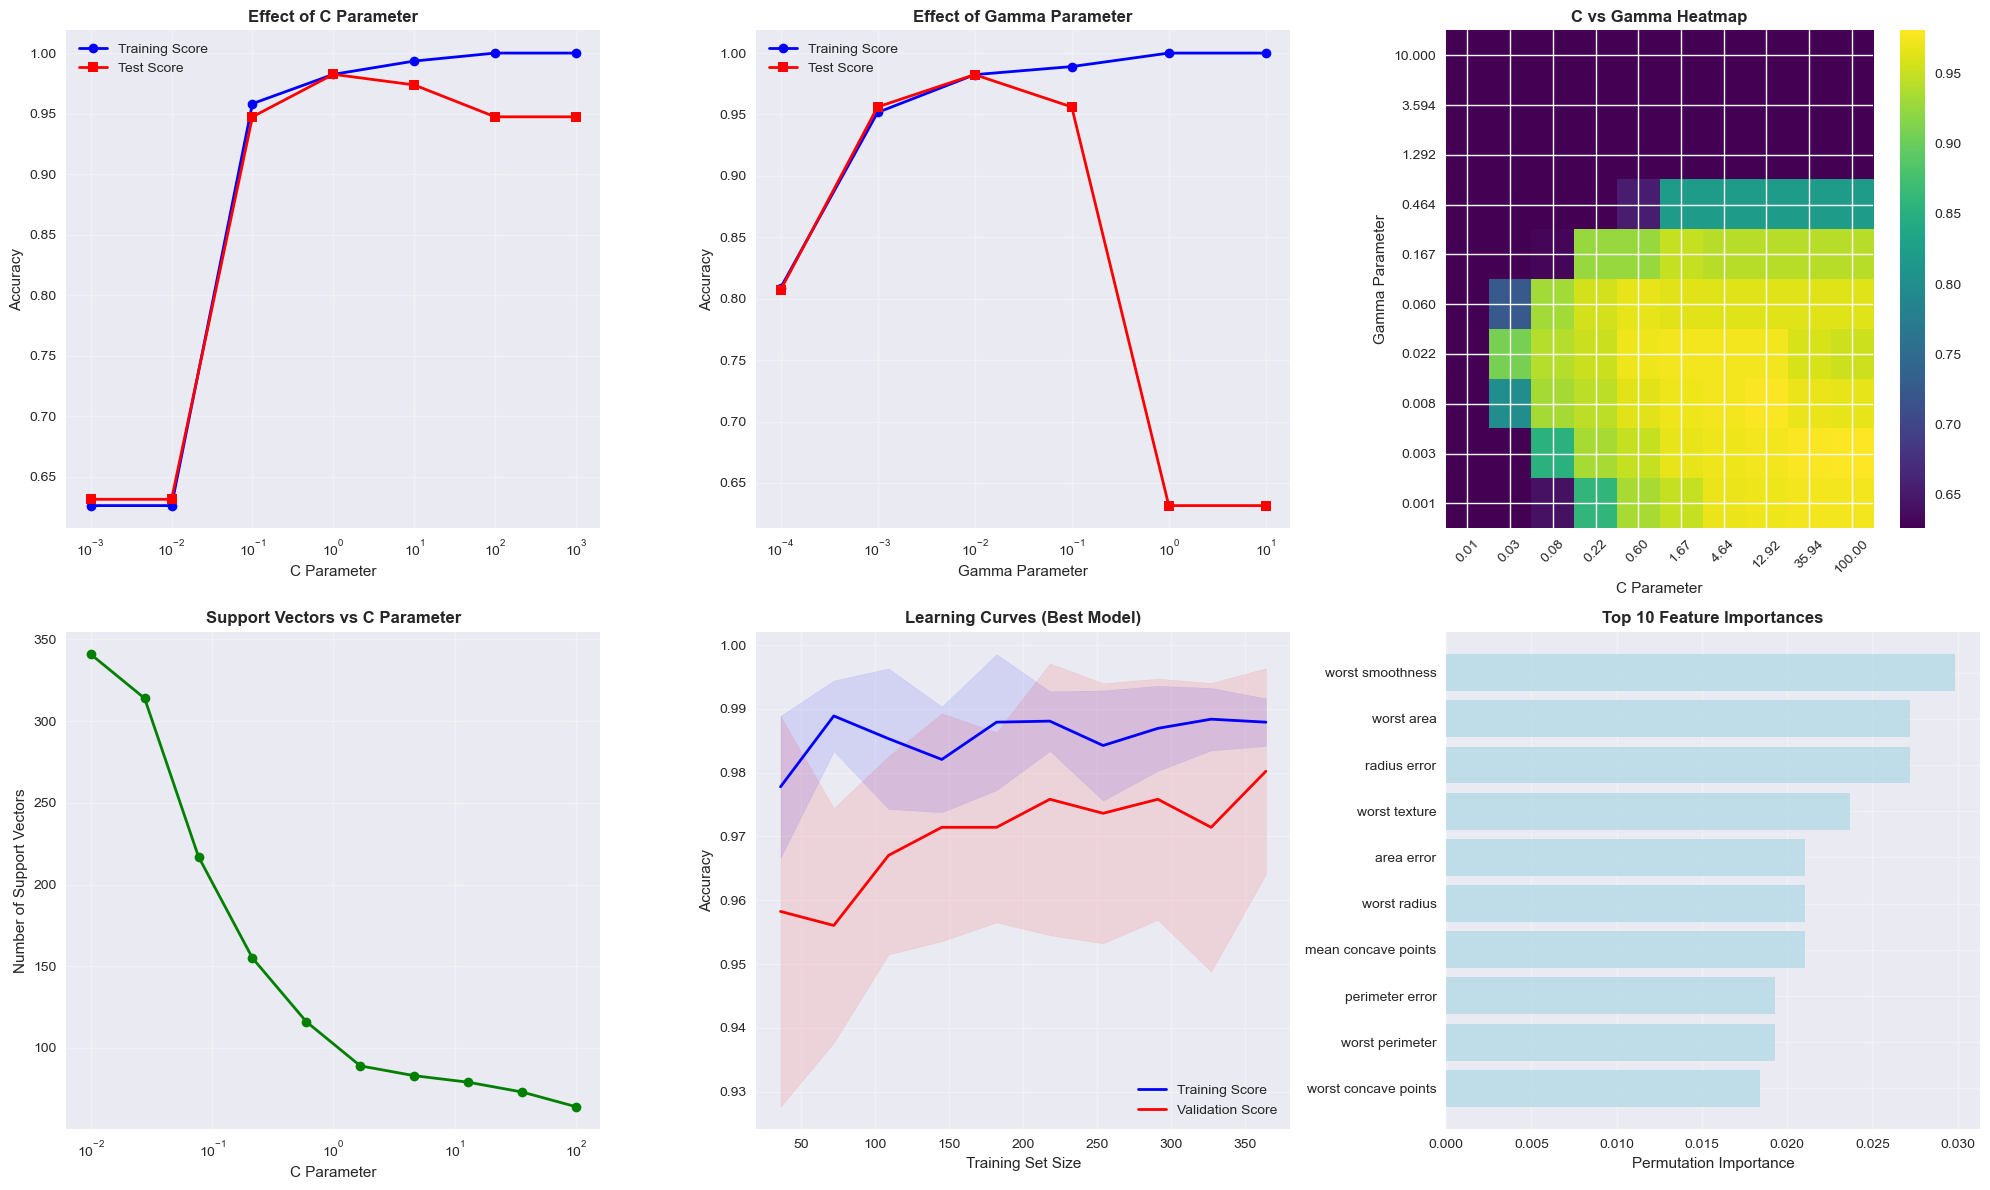


📊 Hyperparameter Tuning Summary:
✅ Optimal C parameter: 10
✅ Optimal gamma parameter: 0.01
✅ Optimal kernel: rbf
✅ Best cross-validation accuracy: 0.980
✅ Test accuracy: 0.982
✅ Number of support vectors: 52

🎯 Tuning Guidelines:
• Start with default parameters (C=1.0, gamma='scale')
• Use Grid Search for exhaustive search
• Use Random Search for faster exploration
• Monitor overfitting with validation curves
• Consider computational cost vs performance gain


In [8]:
# Comprehensive hyperparameter tuning for SVM
print("🎛️ Comprehensive SVM Hyperparameter Tuning")

# Use breast cancer dataset for tuning demonstration
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Dataset: {len(X)} samples, {X.shape[1]} features")
print(f"Training set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")

# 1. C Parameter Tuning (with fixed RBF kernel)
print("\n1️⃣ C Parameter Analysis")
C_range = np.logspace(-3, 3, 7)  # 0.001 to 1000
train_scores_C = []
test_scores_C = []

for C in C_range:
    svm = SVC(kernel='rbf', C=C, random_state=42)
    svm.fit(X_train_scaled, y_train)
    
    train_score = svm.score(X_train_scaled, y_train)
    test_score = svm.score(X_test_scaled, y_test)
    
    train_scores_C.append(train_score)
    test_scores_C.append(test_score)
    
    print(f"C={C:.3f}: Train={train_score:.3f}, Test={test_score:.3f}, Support Vectors={len(svm.support_)}")

# 2. Gamma Parameter Tuning (with fixed C=1.0)
print("\n2️⃣ Gamma Parameter Analysis")
gamma_range = np.logspace(-4, 1, 6)  # 0.0001 to 10
train_scores_gamma = []
test_scores_gamma = []

for gamma in gamma_range:
    svm = SVC(kernel='rbf', C=1.0, gamma=gamma, random_state=42)
    svm.fit(X_train_scaled, y_train)
    
    train_score = svm.score(X_train_scaled, y_train)
    test_score = svm.score(X_test_scaled, y_test)
    
    train_scores_gamma.append(train_score)
    test_scores_gamma.append(test_score)
    
    print(f"Gamma={gamma:.4f}: Train={train_score:.3f}, Test={test_score:.3f}, Support Vectors={len(svm.support_)}")

# 3. Grid Search for optimal parameters
print("\n3️⃣ Grid Search Optimization")

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

# Perform grid search
grid_search = GridSearchCV(
    SVC(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.3f}")

# Test the best model
best_svm = grid_search.best_estimator_
test_score_best = best_svm.score(X_test_scaled, y_test)
print(f"Test score with best parameters: {test_score_best:.3f}")

# 4. Randomized Search (faster alternative)
print("\n4️⃣ Randomized Search")

param_dist = {
    'C': uniform(0.1, 100),
    'gamma': uniform(0.001, 1),
    'kernel': ['rbf', 'poly', 'sigmoid']
}

random_search = RandomizedSearchCV(
    SVC(random_state=42),
    param_dist,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_scaled, y_train)

print(f"Best parameters (Random): {random_search.best_params_}")
print(f"Best CV score (Random): {random_search.best_score_:.3f}")
print(f"Test score (Random): {random_search.best_estimator_.score(X_test_scaled, y_test):.3f}")

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. C parameter effect
axes[0, 0].semilogx(C_range, train_scores_C, 'b-o', label='Training Score', linewidth=2)
axes[0, 0].semilogx(C_range, test_scores_C, 'r-s', label='Test Score', linewidth=2)
axes[0, 0].set_xlabel('C Parameter')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Effect of C Parameter', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Gamma parameter effect
axes[0, 1].semilogx(gamma_range, train_scores_gamma, 'b-o', label='Training Score', linewidth=2)
axes[0, 1].semilogx(gamma_range, test_scores_gamma, 'r-s', label='Test Score', linewidth=2)
axes[0, 1].set_xlabel('Gamma Parameter')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].set_title('Effect of Gamma Parameter', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Validation curve for C and Gamma together
C_range_fine = np.logspace(-2, 2, 10)
gamma_range_fine = np.logspace(-3, 1, 10)

C_grid, gamma_grid = np.meshgrid(C_range_fine, gamma_range_fine)
scores_grid = np.zeros_like(C_grid)

for i, C in enumerate(C_range_fine):
    for j, gamma in enumerate(gamma_range_fine):
        svm = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)
        cv_scores = cross_val_score(svm, X_train_scaled, y_train, cv=3)
        scores_grid[j, i] = cv_scores.mean()

im = axes[0, 2].imshow(scores_grid, cmap='viridis', aspect='auto', origin='lower')
axes[0, 2].set_xticks(range(len(C_range_fine)))
axes[0, 2].set_xticklabels([f'{c:.2f}' for c in C_range_fine], rotation=45)
axes[0, 2].set_yticks(range(len(gamma_range_fine)))
axes[0, 2].set_yticklabels([f'{g:.3f}' for g in gamma_range_fine])
axes[0, 2].set_xlabel('C Parameter')
axes[0, 2].set_ylabel('Gamma Parameter')
axes[0, 2].set_title('C vs Gamma Heatmap', fontweight='bold')
plt.colorbar(im, ax=axes[0, 2])

# 4. Number of support vectors vs C
support_vectors_count = []
C_range_sv = np.logspace(-2, 2, 10)

for C in C_range_sv:
    svm = SVC(kernel='rbf', C=C, gamma='scale', random_state=42)
    svm.fit(X_train_scaled, y_train)
    support_vectors_count.append(len(svm.support_))

axes[1, 0].semilogx(C_range_sv, support_vectors_count, 'g-o', linewidth=2)
axes[1, 0].set_xlabel('C Parameter')
axes[1, 0].set_ylabel('Number of Support Vectors')
axes[1, 0].set_title('Support Vectors vs C Parameter', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 5. Learning curves for best model
train_sizes, train_scores_lc, test_scores_lc = learning_curve(
    best_svm, X_train_scaled, y_train, cv=5, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    random_state=42
)

train_mean = np.mean(train_scores_lc, axis=1)
train_std = np.std(train_scores_lc, axis=1)
test_mean = np.mean(test_scores_lc, axis=1)
test_std = np.std(test_scores_lc, axis=1)

axes[1, 1].plot(train_sizes, train_mean, 'b-', label='Training Score', linewidth=2)
axes[1, 1].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
axes[1, 1].plot(train_sizes, test_mean, 'r-', label='Validation Score', linewidth=2)
axes[1, 1].fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')
axes[1, 1].set_xlabel('Training Set Size')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].set_title('Learning Curves (Best Model)', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 6. Feature importance (using permutation)
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(best_svm, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Get top 10 most important features
top_indices = np.argsort(perm_importance.importances_mean)[-10:]
top_features = [cancer.feature_names[i] for i in top_indices]
top_importances = perm_importance.importances_mean[top_indices]

axes[1, 2].barh(top_features, top_importances, color='lightblue', alpha=0.7)
axes[1, 2].set_xlabel('Permutation Importance')
axes[1, 2].set_title('Top 10 Feature Importances', fontweight='bold')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary of tuning results
print("\n📊 Hyperparameter Tuning Summary:")
print(f"✅ Optimal C parameter: {grid_search.best_params_['C']}")
print(f"✅ Optimal gamma parameter: {grid_search.best_params_['gamma']}")
print(f"✅ Optimal kernel: {grid_search.best_params_['kernel']}")
print(f"✅ Best cross-validation accuracy: {grid_search.best_score_:.3f}")
print(f"✅ Test accuracy: {test_score_best:.3f}")
print(f"✅ Number of support vectors: {len(best_svm.support_)}")

print("\n🎯 Tuning Guidelines:")
print("• Start with default parameters (C=1.0, gamma='scale')")
print("• Use Grid Search for exhaustive search")
print("• Use Random Search for faster exploration")
print("• Monitor overfitting with validation curves")
print("• Consider computational cost vs performance gain")

## **🌍 7. Real-World Applications** <a id="applications"></a>

### **Text Classification with SVM**
SVMs are particularly effective for text classification due to their ability to handle high-dimensional sparse data.

🍷 Real-World Application: Wine Quality Classification
Dataset  : 178 wine samples
Features : 13 chemical properties
Classes  : ['class_0' 'class_1' 'class_2']
Class distribution: [59 71 48]

🧪 Chemical Features:
 1. alcohol
 2. malic_acid
 3. ash
 4. alcalinity_of_ash
 5. magnesium
 6. total_phenols
 7. flavanoids
 8. nonflavanoid_phenols
 9. proanthocyanins
10. color_intensity
11. hue
12. od280/od315_of_diluted_wines
13. proline

🎯 Comprehensive SVM Analysis for Wine Classification

📊 Kernel Comparison Results:


,Kernel,CV_Mean,CV_Std,Test_Score,Support_Vectors,SV_Percentage
0,linear,0.976,0.020,0.963,24,19.355
1,rbf,0.992,0.016,0.981,57,45.968
2,poly,0.935,0.020,0.907,66,53.226
3,sigmoid,0.984,0.020,0.963,39,31.452



🔧 Optimizing RBF SVM
Best parameters: {'C': 1, 'gamma': 'scale'}
Best CV score  : 0.992
Test score     : 0.981

📋 Detailed Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       0.95      1.00      0.98        21
     class_2       1.00      0.93      0.97        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54


🔍 Top 10 Most Important Features (Linear SVM):


,Feature,Importance
10,hue,0.437
6,flavanoids,0.401
8,proanthocyanins,0.375
3,alcalinity_of_ash,0.374
12,proline,0.364
0,alcohol,0.340
9,color_intensity,0.334
11,od280/od315_of_diluted_wines,0.330
2,ash,0.262
5,total_phenols,0.134


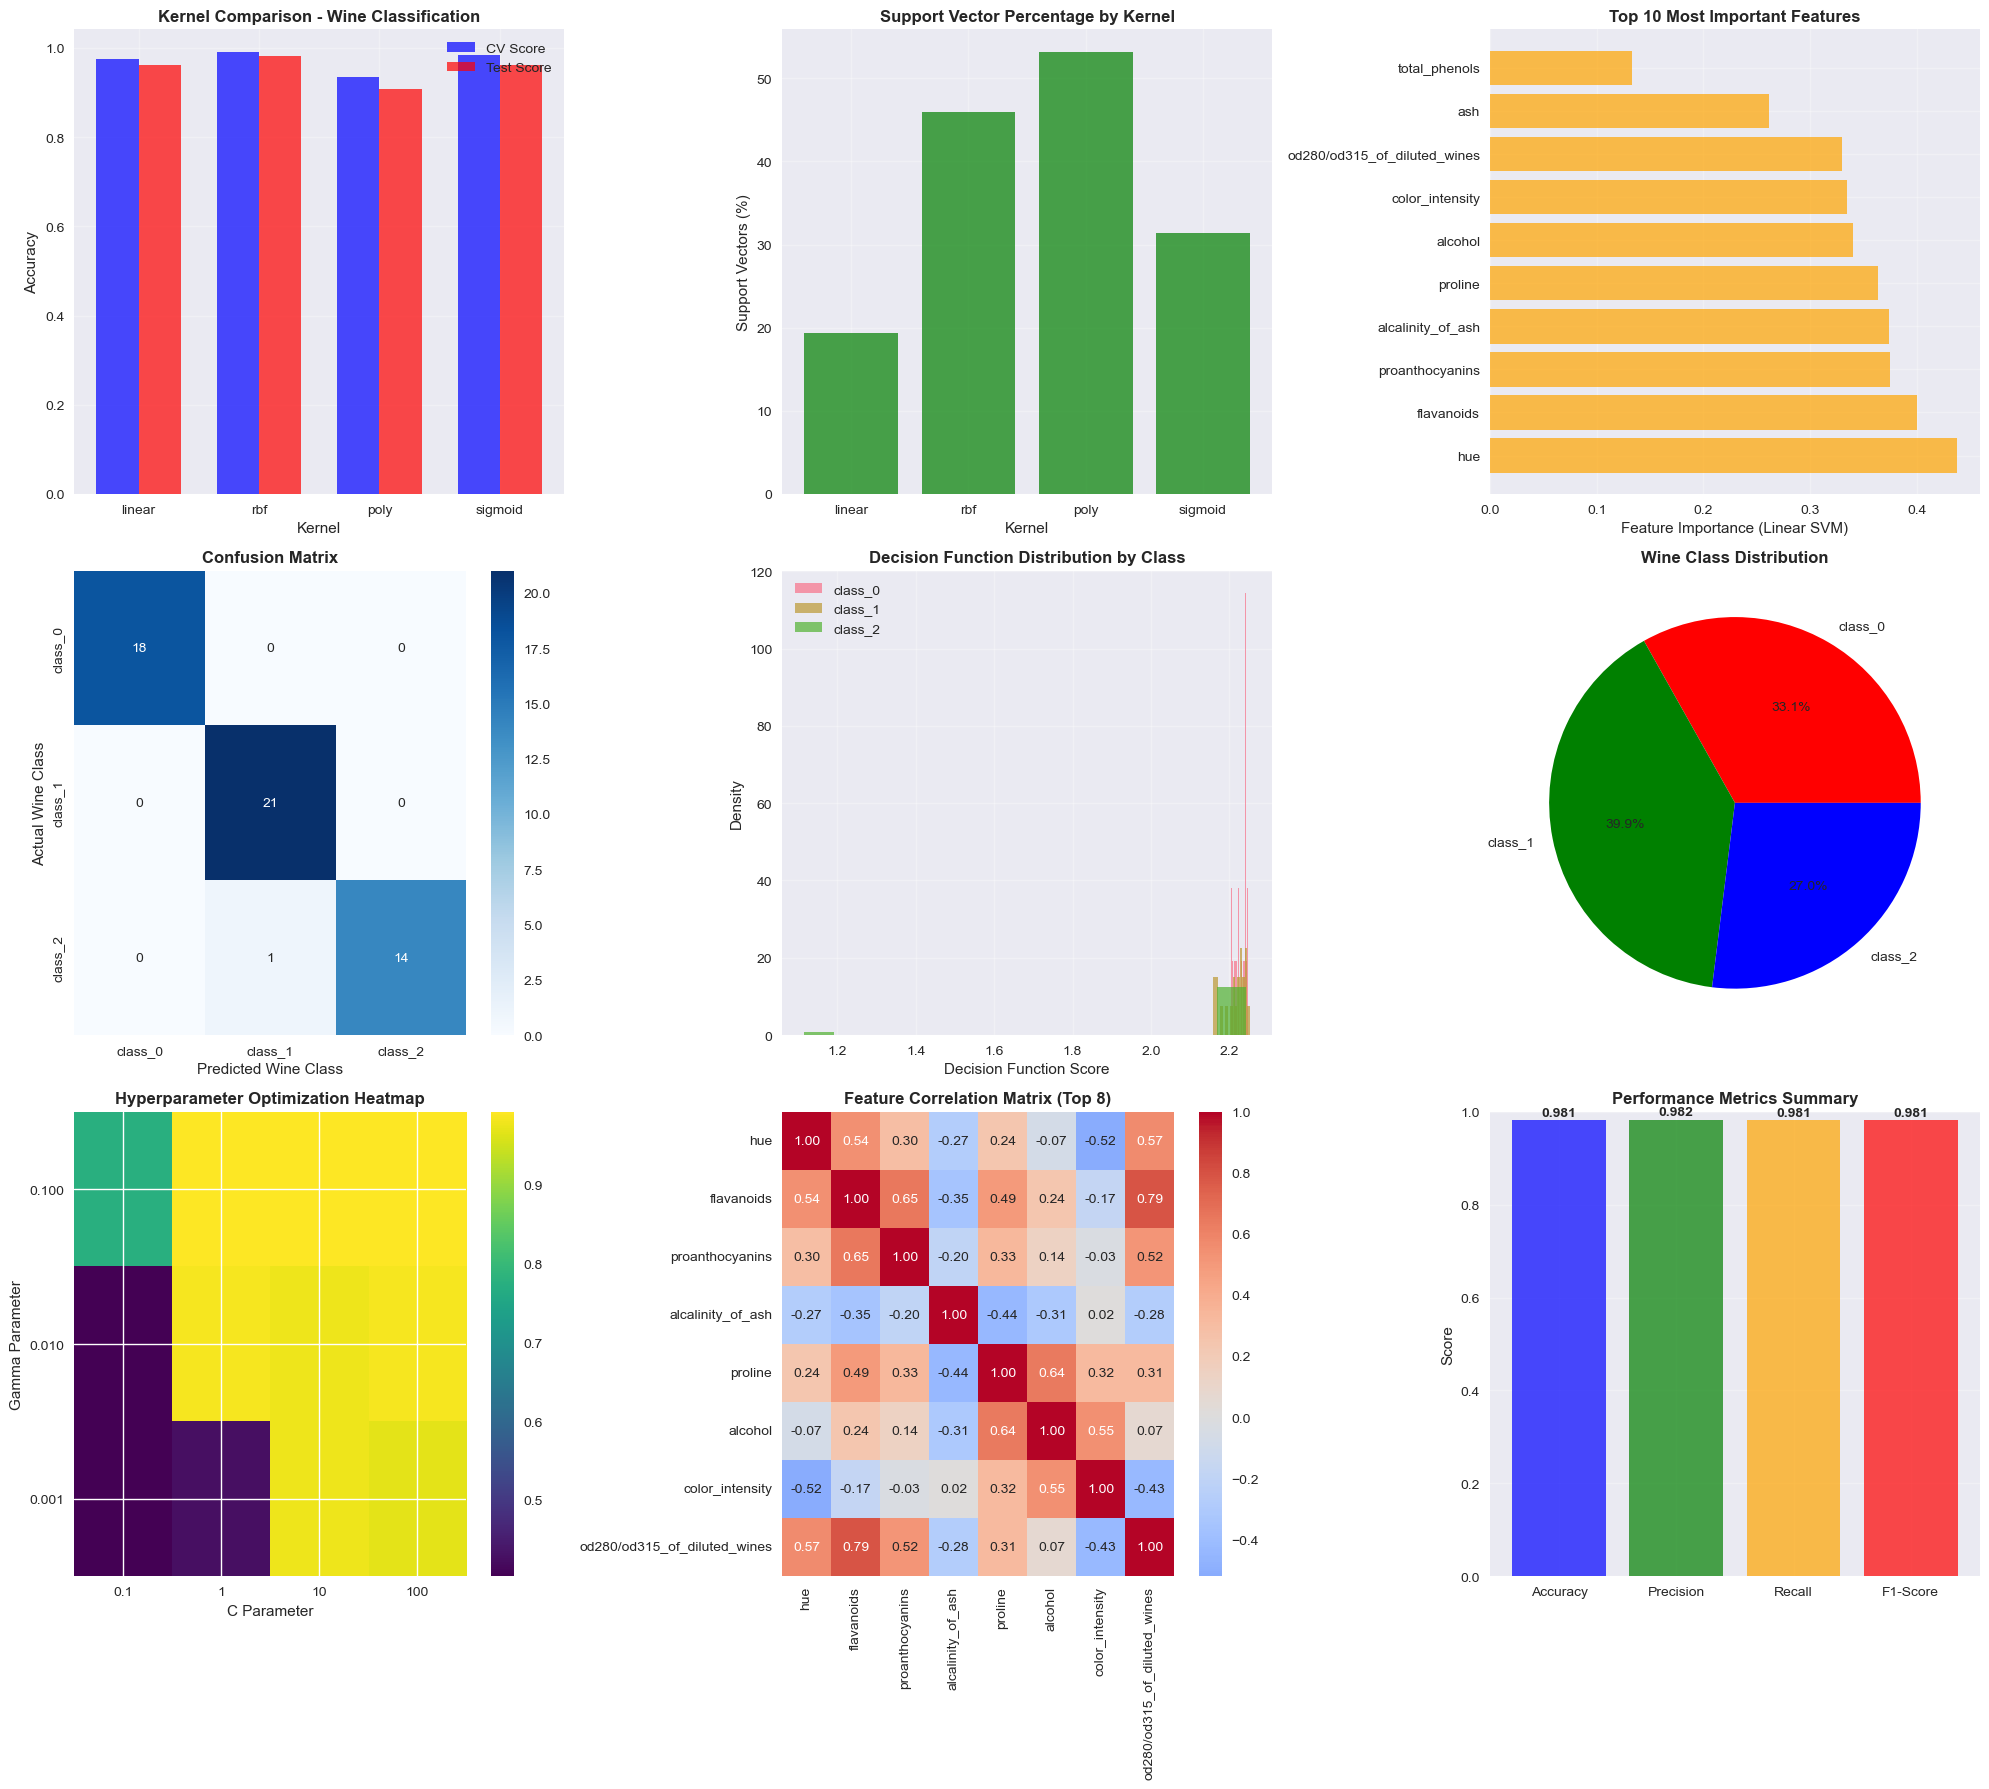


🍷 Wine Classification Insights:
• Achieved 98.1% accuracy in classifying wine types
• Top discriminating features: hue, flavanoids, proanthocyanins
• Model uses 57 support vectors (46.0% of training data)
• Best kernel: rbf with C=1 and gamma=scale

📈 Business Applications:
• Quality control in wine production
• Automated wine classification for inventory management
• Fraud detection for wine authentication
• Recipe optimization based on chemical analysis
• Customer recommendation systems


In [12]:
# Real-world application: Wine Quality Classification
print("🍷 Real-World Application: Wine Quality Classification")

# Load wine dataset
wine = load_wine()
X_wine, y_wine = wine.data, wine.target

print(f"Dataset  : {len(X_wine)} wine samples")
print(f"Features : {len(wine.feature_names)} chemical properties")
print(f"Classes  : {wine.target_names}")
print(f"Class distribution: {np.bincount(y_wine)}")

# Display feature names
print("\n🧪 Chemical Features:")
for i, feature in enumerate(wine.feature_names):
    print(f"{i+1:2d}. {feature}")

# Split and scale data
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.3, random_state=42, stratify=y_wine)

scaler_wine = StandardScaler()
X_train_wine_scaled = scaler_wine.fit_transform(X_train_wine)
X_test_wine_scaled = scaler_wine.transform(X_test_wine)

# Comprehensive SVM analysis
print("\n🎯 Comprehensive SVM Analysis for Wine Classification")

# 1. Compare different kernels
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
kernel_results = []

for kernel in kernels:
    # Use cross-validation to get robust estimates
    svm = SVC(kernel=kernel, random_state=42)
    cv_scores = cross_val_score(svm, X_train_wine_scaled, y_train_wine, cv=5)
    
    # Train and test
    svm.fit(X_train_wine_scaled, y_train_wine)
    test_score = svm.score(X_test_wine_scaled, y_test_wine)
    
    kernel_results.append({
        'Kernel': kernel,
        'CV_Mean': cv_scores.mean(),
        'CV_Std': cv_scores.std(),
        'Test_Score': test_score,
        'Support_Vectors': len(svm.support_),
        'SV_Percentage': len(svm.support_) / len(X_train_wine_scaled) * 100
    })

kernel_df = pd.DataFrame(kernel_results)
print("\n📊 Kernel Comparison Results:")
display(kernel_df.round(3))

# 2. Optimize best kernel (RBF typically performs well)
print("\n🔧 Optimizing RBF SVM")

param_grid_wine = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

grid_search_wine = GridSearchCV(
    SVC(kernel='rbf', random_state=42),
    param_grid_wine,
    cv=5,
    scoring='accuracy'
)

grid_search_wine.fit(X_train_wine_scaled, y_train_wine)
best_svm_wine = grid_search_wine.best_estimator_

print(f"Best parameters: {grid_search_wine.best_params_}")
print(f"Best CV score  : {grid_search_wine.best_score_:.3f}")
print(f"Test score     : {best_svm_wine.score(X_test_wine_scaled, y_test_wine):.3f}")

# 3. Detailed evaluation
y_pred_wine = best_svm_wine.predict(X_test_wine_scaled)
y_proba_wine = best_svm_wine.decision_function(X_test_wine_scaled)

print("\n📋 Detailed Classification Report:")
print(classification_report(y_test_wine, y_pred_wine, target_names=wine.target_names))

# 4. Feature importance analysis
# For SVM, we use the magnitude of weights for linear kernel or permutation importance
linear_svm = SVC(kernel='linear', C=1.0, random_state=42)
linear_svm.fit(X_train_wine_scaled, y_train_wine)

# Get feature weights (for multiclass, take the mean across classes)
feature_weights = np.abs(linear_svm.coef_).mean(axis=0)
feature_importance_wine = pd.DataFrame({
    'Feature': wine.feature_names,
    'Importance': feature_weights
}).sort_values('Importance', ascending=False)

print("\n🔍 Top 10 Most Important Features (Linear SVM):")
display(feature_importance_wine.head(10).round(3))

# Comprehensive visualization
fig, axes = plt.subplots(3, 3, figsize=(20, 18))

# 1. Kernel comparison
kernel_names = kernel_df['Kernel']
cv_means = kernel_df['CV_Mean']
test_scores = kernel_df['Test_Score']

x_pos = np.arange(len(kernel_names))
width = 0.35

axes[0, 0].bar(x_pos - width/2, cv_means, width, label='CV Score', alpha=0.7, color='blue')
axes[0, 0].bar(x_pos + width/2, test_scores, width, label='Test Score', alpha=0.7, color='red')
axes[0, 0].set_xlabel('Kernel')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Kernel Comparison - Wine Classification', fontweight='bold')
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels(kernel_names)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Support vectors percentage
axes[0, 1].bar(kernel_names, kernel_df['SV_Percentage'], color='green', alpha=0.7)
axes[0, 1].set_xlabel('Kernel')
axes[0, 1].set_ylabel('Support Vectors (%)')
axes[0, 1].set_title('Support Vector Percentage by Kernel', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 3. Feature importance (top 10)
top_features = feature_importance_wine.head(10)
axes[0, 2].barh(top_features['Feature'], top_features['Importance'], color='orange', alpha=0.7)
axes[0, 2].set_xlabel('Feature Importance (Linear SVM)')
axes[0, 2].set_title('Top 10 Most Important Features', fontweight='bold')
axes[0, 2].grid(True, alpha=0.3)

# 4. Confusion matrix
cm_wine = confusion_matrix(y_test_wine, y_pred_wine)
sns.heatmap(cm_wine, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0],
            xticklabels=wine.target_names, yticklabels=wine.target_names)
axes[1, 0].set_xlabel('Predicted Wine Class')
axes[1, 0].set_ylabel('Actual Wine Class')
axes[1, 0].set_title('Confusion Matrix', fontweight='bold')

# 5. Decision function distribution
for i, wine_class in enumerate(wine.target_names):
    class_scores = y_proba_wine[y_test_wine == i]
    axes[1, 1].hist(class_scores[:, i], bins=15, alpha=0.7, label=wine_class, density=True)

axes[1, 1].set_xlabel('Decision Function Score')
axes[1, 1].set_ylabel('Density')
axes[1, 1].set_title('Decision Function Distribution by Class', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 6. Class distribution in original dataset
class_counts = np.bincount(y_wine)
axes[1, 2].pie(class_counts, labels=wine.target_names, autopct='%1.1f%%', colors=['red', 'green', 'blue'])
axes[1, 2].set_title('Wine Class Distribution', fontweight='bold')

# 7. Hyperparameter heatmap
C_values = param_grid_wine['C']
gamma_values = [g for g in param_grid_wine['gamma'] if isinstance(g, float)]

if gamma_values:  # Only if we have numeric gamma values
    C_grid, gamma_grid = np.meshgrid(C_values, gamma_values)
    scores_matrix = np.zeros_like(C_grid)
    
    for i, C in enumerate(C_values):
        for j, gamma in enumerate(gamma_values):
            svm_temp = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)
            score = cross_val_score(svm_temp, X_train_wine_scaled, y_train_wine, cv=3).mean()
            scores_matrix[j, i] = score
    
    im = axes[2, 0].imshow(scores_matrix, cmap='viridis', aspect='auto', origin='lower')
    axes[2, 0].set_xticks(range(len(C_values)))
    axes[2, 0].set_xticklabels(C_values)
    axes[2, 0].set_yticks(range(len(gamma_values)))
    axes[2, 0].set_yticklabels([f'{g:.3f}' for g in gamma_values])
    axes[2, 0].set_xlabel('C Parameter')
    axes[2, 0].set_ylabel('Gamma Parameter')
    axes[2, 0].set_title('Hyperparameter Optimization Heatmap', fontweight='bold')
    plt.colorbar(im, ax=axes[2, 0])

# 8. Feature correlation matrix (top features only)
top_feature_indices = feature_importance_wine.head(8).index
correlation_matrix = np.corrcoef(X_wine[:, top_feature_indices].T)
top_feature_names = [wine.feature_names[i] for i in top_feature_indices]

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[2, 1],xticklabels=top_feature_names, yticklabels=top_feature_names, fmt='.2f')
axes[2, 1].set_title('Feature Correlation Matrix (Top 8)', fontweight='bold')

# 9. Performance metrics comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = [
    accuracy_score(y_test_wine, y_pred_wine),
    precision_score(y_test_wine, y_pred_wine, average='weighted'),
    recall_score(y_test_wine, y_pred_wine, average='weighted'),
    f1_score(y_test_wine, y_pred_wine, average='weighted')
]

axes[2, 2].bar(metrics, scores, color=['blue', 'green', 'orange', 'red'], alpha=0.7)
axes[2, 2].set_ylabel('Score')
axes[2, 2].set_title('Performance Metrics Summary', fontweight='bold')
axes[2, 2].set_ylim(0, 1)
for i, score in enumerate(scores):
    axes[2, 2].text(i, score + 0.01, f'{score:.3f}', ha='center', fontweight='bold')
axes[2, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Business insights
print("\n🍷 Wine Classification Insights:")
print(f"• Achieved {accuracy_score(y_test_wine, y_pred_wine):.1%} accuracy in classifying wine types")
print(f"• Top discriminating features: {', '.join(feature_importance_wine.head(3)['Feature'].values)}")
print(f"• Model uses {len(best_svm_wine.support_)} support vectors ({len(best_svm_wine.support_)/len(X_train_wine_scaled)*100:.1f}% of training data)")
print(f"• Best kernel: rbf with C={grid_search_wine.best_params_['C']} and gamma={grid_search_wine.best_params_['gamma']}")
print("\n📈 Business Applications:")
print("• Quality control in wine production")
print("• Automated wine classification for inventory management")
print("• Fraud detection for wine authentication")
print("• Recipe optimization based on chemical analysis")
print("• Customer recommendation systems")

## **✅ 8. Advantages & Limitations** <a id="pros-cons"></a>

### **Advantages:** ✅

1. **Effective in High Dimensions**: Works well when number of features > number of samples
2. **Memory Efficient**: Uses only support vectors, not entire dataset
3. **Versatile**: Different kernel functions for various data patterns
4. **Robust to Outliers**: Decision boundary depends only on support vectors
5. **Strong Theoretical Foundation**: Based on statistical learning theory
6. **Good Generalization**: Maximizes margin for better generalization
7. **Global Optimum**: Convex optimization problem guarantees global optimum

### **Limitations:** ❌

1. **Slow on Large Datasets**: Training time complexity is O(n²) to O(n³)
2. **Sensitive to Feature Scaling**: Requires feature normalization
3. **No Probability Estimates**: Doesn't provide direct probability outputs
4. **Parameter Sensitive**: Performance depends heavily on C and kernel parameters
5. **Black Box**: Limited interpretability, especially with non-linear kernels
6. **Memory Requirements**: Can be memory-intensive for large datasets
7. **Choice of Kernel**: Requires domain knowledge for optimal kernel selection

### **When to Use SVM:** 🎯

**✅ Ideal Scenarios:**
- High-dimensional data (text classification, gene expression)
- Small to medium datasets (< 10,000 samples)
- Clear margin of separation exists
- Non-linear relationships (with appropriate kernels)
- Binary classification problems
- Robust decision boundaries needed

**❌ Avoid When:**
- Very large datasets (> 100,000 samples)
- Noisy data with overlapping classes
- Real-time predictions required
- Probability estimates are crucial
- Simple linear relationships exist
- Highly interpretable models needed

## **📝 9. Best Practices & Summary** <a id="best-practices"></a>

### **SVM in a Nutshell:** 🌰

Support Vector Machine is a powerful supervised learning algorithm that finds the optimal hyperplane to separate classes by maximizing the margin. It uses the kernel trick to handle non-linear relationships and focuses on support vectors for decision making.

### **Key Concepts Learned:** 💡

1. **Maximum Margin**: SVM finds the optimal decision boundary with maximum margin
2. **Support Vectors**: Only the closest points to the boundary matter for classification
3. **Kernel Trick**: Maps data to higher dimensions for non-linear separation
4. **Regularization**: C parameter controls trade-off between margin and misclassification
5. **Gamma Parameter**: Controls influence of individual training examples

### **Best Practices:** 🎯

#### **Data Preprocessing:**
1. **Always Scale Features**: Use StandardScaler or MinMaxScaler
2. **Handle Missing Values**: Impute or remove missing data
3. **Feature Selection**: Remove irrelevant features to improve performance
4. **Outlier Detection**: Consider outlier removal for better margins

#### **Model Selection:**
1. **Start Simple**: Begin with linear kernel, then try RBF
2. **Cross-Validation**: Always use CV for parameter selection
3. **Grid Search**: Systematically tune C and gamma parameters
4. **Validation Curves**: Plot learning curves to detect overfitting

#### **Hyperparameter Tuning:**
1. **C Parameter**: Start with [0.1, 1, 10, 100]
2. **Gamma**: Use ['scale', 'auto', 0.001, 0.01, 0.1, 1]
3. **Kernel Choice**: Linear → Polynomial → RBF → Sigmoid
4. **Nested CV**: Use for unbiased performance estimates

### **Performance Tips:** ⚡

- **Memory Optimization**: Use `LinearSVC` for large datasets with linear kernels
- **Probability Calibration**: Use `CalibratedClassifierCV` for probability estimates
- **Parallel Processing**: Set `n_jobs=-1` for faster grid search
- **Early Stopping**: Monitor convergence for large datasets
- **Feature Engineering**: Create polynomial features manually instead of polynomial kernel

### **Comparison with Other Methods:**

| **Algorithm** | **Accuracy** | **Speed** | **Memory** | **Interpretability** | **Scalability** |
|---------------|--------------|-----------|------------|---------------------|-----------------|
| **SVM** | ⭐⭐⭐⭐ | ⭐⭐ | ⭐⭐⭐ | ⭐⭐ | ⭐⭐ |
| **Random Forest** | ⭐⭐⭐⭐ | ⭐⭐⭐⭐ | ⭐⭐⭐ | ⭐⭐⭐ | ⭐⭐⭐ |
| **Neural Networks** | ⭐⭐⭐⭐⭐ | ⭐⭐⭐ | ⭐⭐ | ⭐ | ⭐⭐⭐⭐ |
| **Logistic Regression** | ⭐⭐⭐ | ⭐⭐⭐⭐⭐ | ⭐⭐⭐⭐⭐ | ⭐⭐⭐⭐⭐ | ⭐⭐⭐⭐⭐ |

### **Common Pitfalls to Avoid:** ⚠️

1. **Forgetting Feature Scaling**: Most common mistake with SVM
2. **Using Wrong Kernel**: Linear kernel for non-linear data
3. **Overfitting**: Too high C or gamma values
4. **Ignoring Class Imbalance**: Use `class_weight='balanced'`
5. **Not Cross-Validating**: Leads to overly optimistic results
6. **Inappropriate Dataset Size**: Using SVM on very large datasets

### **Next Steps:** 🚀

1. **Advanced Kernels**: Explore custom kernels for specific domains
2. **Multi-class Strategies**: Learn One-vs-One and One-vs-Rest approaches
3. **SVR**: Explore Support Vector Regression for continuous targets
4. **Online SVM**: Learn algorithms for streaming data
5. **Deep Learning**: Understand relationship between SVM and neural networks
6. **Optimization**: Study SMO (Sequential Minimal Optimization) algorithm

### **Real-World Success Stories:** 🌟

- **Text Classification**: Email spam detection, sentiment analysis
- **Image Recognition**: Face detection, object classification
- **Bioinformatics**: Gene classification, protein structure prediction
- **Finance**: Credit scoring, fraud detection
- **Medical Diagnosis**: Cancer detection, drug discovery

### **Final Thoughts:** 💭

SVM remains one of the most elegant and theoretically sound machine learning algorithms. While newer methods like deep learning have gained popularity, SVM's strong mathematical foundation, interpretability, and effectiveness in high-dimensional spaces make it a valuable tool in any data scientist's toolkit. Its ability to handle non-linear relationships through kernels, combined with strong generalization properties, ensures its continued relevance in modern machine learning applications.